<p dir=rtl style="direction: rtl; text-align: center">
<font size=5 color='red'>
Reading and Understanding the Data
</font>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from numpy import nan as NA
df = pd.read_csv('Amsterdam housing prices.csv', sep=',', header=0 )
df = pd.DataFrame(df)
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


<p dir=rtl style="direction: rtl; text-align: center">
<font size=5 color='red'>
Data Inspection
</font>
</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
df.shape

(924, 8)

In [ ]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [ ]:
df.value_counts([df.Area <= 60])

Area 
False    693
True     231
Name: count, dtype: int64

In [ ]:
df.value_counts([df.Area >=120])

Area 
False    726
True     198
Name: count, dtype: int64

In [ ]:
df.value_counts((df.Area >= 60) & (df.Area <= 120))

Area
True     513
False    411
Name: count, dtype: int64

In [ ]:
df['Room'].value_counts()

Room
3     333
4     201
2     191
5      97
6      42
7      19
1      17
8      11
9       6
13      2
10      2
14      2
12      1
Name: count, dtype: int64

In [ ]:
grouped = df.groupby('Room')
grouped[['Room','Area']].agg('mean').round()

,Room,Area
Room,,
1,1.0,60.0
2,2.0,54.0
3,3.0,80.0
4,4.0,102.0
5,5.0,134.0
6,6.0,150.0
7,7.0,200.0
8,8.0,244.0
9,9.0,200.0


In [ ]:
grouped = df.groupby('Room')
grouped[['Room','Area','Price']].agg('mean').round().sort_values(by=['Price'])

,Room,Area,Price
Room,,,
2,2.0,54.0,383479.0
1,1.0,60.0,394529.0
3,3.0,80.0,512416.0
4,4.0,102.0,609845.0
5,5.0,134.0,845076.0
6,6.0,150.0,919929.0
7,7.0,200.0,1394737.0
9,9.0,200.0,1450000.0
8,8.0,244.0,1751636.0


<p dir=rtl style="direction: rtl; text-align: center">
<font size=5 color='red'>
Data Cleaning
</font>
</p>

In [ ]:
df.isna().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [ ]:
df.fillna( value={'Price': df['Price'].mean()} , inplace=True)

,Area,Room,Price
0,64,3,685000.0
1,60,3,475000.0
2,109,4,850000.0
3,128,6,580000.0
4,138,5,720000.0
...,...,...,...
919,117,1,750000.0
920,72,3,350000.0
921,51,3,350000.0
922,113,4,599000.0


In [ ]:
df.rename(columns = {'Unnamed: 0':'Number'} , inplace=True)
df

,Number,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


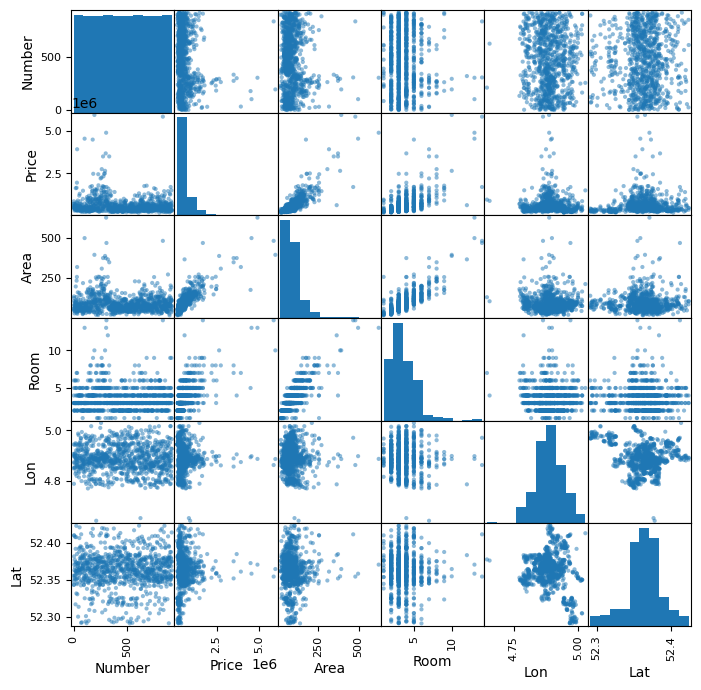

In [ ]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df,figsize=(8,8))

In [ ]:
df.drop(columns = ["Zip" , "Lat" , "Lon" , "Number" , "Address"] , inplace=True ) 
df

,Price,Area,Room
0,685000.0,64,3
1,475000.0,60,3
2,850000.0,109,4
3,580000.0,128,6
4,720000.0,138,5
...,...,...,...
919,750000.0,117,1
920,350000.0,72,3
921,350000.0,51,3
922,599000.0,113,4


<p dir=rtl style="direction: rtl; text-align: center">
<font size=5 color='red'>
 which variables are highly correlated 
</font>
</p>

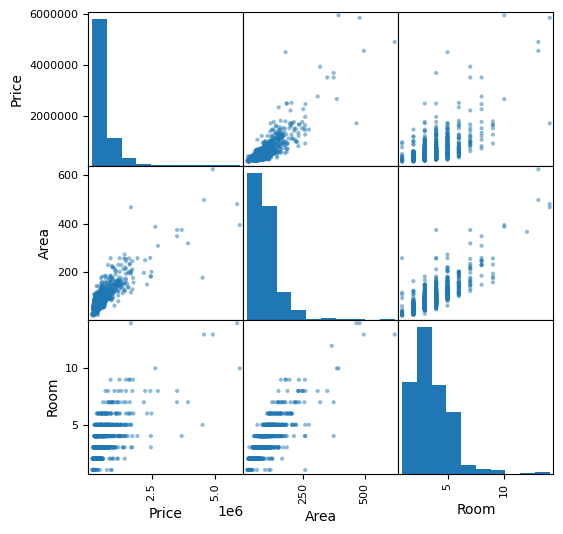

In [ ]:
matrix = scatter_matrix(df,figsize=(6,6))

In [ ]:
room=df.Room
area=df.Area
corr=area.corr(room)
corr

0.8124209078809052

In [ ]:
room=df.Room
price=df.Price
corr=room.corr(price)
corr

0.6234480047123797

In [ ]:
price=df.Price
area=df.Area
corr=price.corr(area)
corr

0.8350901785664225

Text(0.5, 0, 'Area')

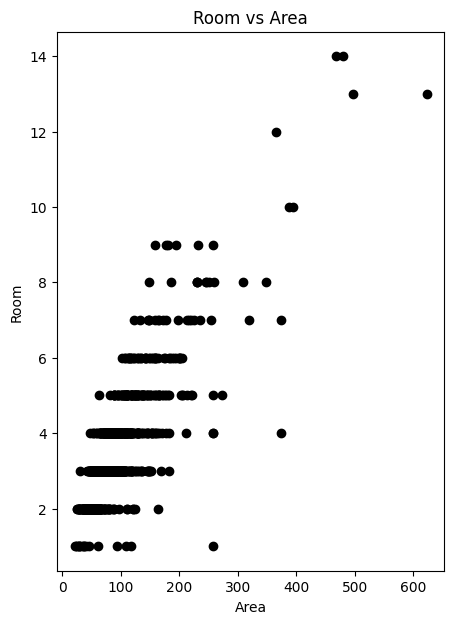

In [ ]:
fig , ax = plt.subplots(figsize=(5,7))
room = df.Room
area = df.Area
ax.scatter(area , room ,color='black')
ax.set_title("Room vs Area")
ax.set_ylabel("Room")
ax.set_xlabel("Area")

Text(0.5, 0, 'Area')

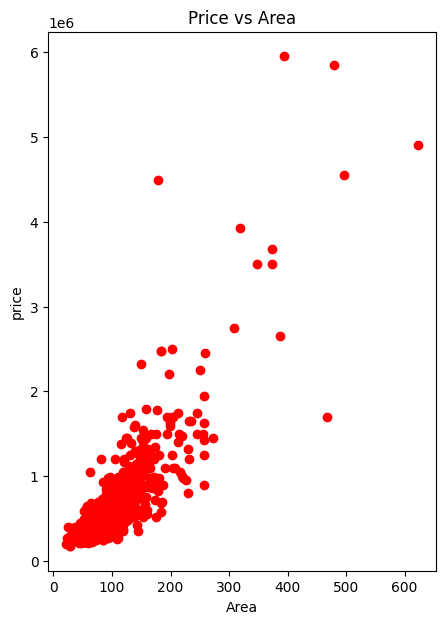

In [ ]:
fig , ax = plt.subplots( figsize=(5,7))
price = df.Price
area = df.Area
ax.scatter(area , price , color='red')
ax.set_title("Price vs Area")
ax.set_ylabel("price")
ax.set_xlabel("Area")

Text(0.5, 0, 'Price')

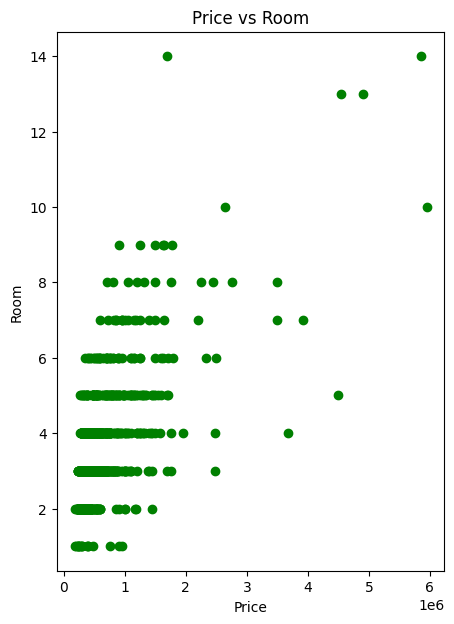

In [ ]:
fig , ax = plt.subplots( figsize=(5,7))
room = df.Room
price = df.Price
ax.scatter(price , room,color='green')
ax.set_title("Price vs Room")
ax.set_ylabel("Room" )
ax.set_xlabel("Price")

<p dir=rtl style="direction: rtl; text-align: center">
<font size=5 color='red'>
Model Building
</font>
</p>

In [ ]:
df=df.reindex(columns = ['Area','Room','Price'] ) 
df

,Area,Room,Price
0,64,3,685000.0
1,60,3,475000.0
2,109,4,850000.0
3,128,6,580000.0
4,138,5,720000.0
...,...,...,...
919,117,1,750000.0
920,72,3,350000.0
921,51,3,350000.0
922,113,4,599000.0


In [ ]:
x = df.iloc[:,1:2] #Room
y = df.iloc[:,0:1] #Area
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model = model.fit(x_train,y_train)   
model.coef_
y_pred = model.predict(x_test)
y_error = y_test - y_pred 
r2_score(y_test,y_pred)

0.7016810567980195

In [ ]:
x = df.iloc[:,1:2] #Room
y = df.iloc[:,2:3] #price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model = model.fit(x_train,y_train)   
model.coef_
y_pred = model.predict(x_test)
y_error = y_test - y_pred 
r2_score(y_test,y_pred)

0.4626798137285869

In [ ]:
x = df.iloc[:,0:1] #Area
y = df.iloc[:,2:3] #price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model = model.fit(x_train,y_train)   
model.coef_
y_pred = model.predict(x_test)
y_error = y_test - y_pred 
r2_score(y_test,y_pred)

0.7864104446768053

In [ ]:
x = df.iloc[:,0:2] #Area&Room
y = df.iloc[:,2:3] #price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model = model.fit(x_train,y_train)   
y_pred = model.predict(x_test)
y_error = y_test - y_pred 
r2_score(y_test,y_pred)

0.7923990143758549